### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Features:

Age: Customer's age<br>
Gender: Customer's gender (0: Male, 1: Female)<br>
Annual Income: Annual income of the customer in dollars<br>
Number of Purchases: Total number of purchases made by the customer<br>
Product Category: Category of the purchased product (0: Electronics, 1: Clothing, 2: Home Goods, 3: Beauty, 4: Sports)<br>
Time Spent on Website: Time spent by the customer on the website in minutes<br>
Loyalty Program: Whether the customer is a member of the loyalty program (0: No, 1: Yes)<br>
Discounts Availed: Number of discounts availed by the customer (range: 0-5)<br>
PurchaseStatus (Target Variable): Likelihood of the customer making a purchase (0: No, 1: Yes)<br>

Target Variable:

Distribution of the Target Variable (PurchaseStatus):<br>


### Reading the dataset

In [2]:
df = pd.read_csv("customer_purchase_data.csv")
df

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1
...,...,...,...,...,...,...,...,...,...
1495,39,1,65048.141834,13,0,34.590743,0,5,1
1496,67,1,28775.331069,18,2,17.625707,0,1,1
1497,40,1,57363.247541,7,4,12.206033,0,0,0
1498,63,0,134021.775532,16,2,37.311634,1,0,1


### Summary of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [4]:
df.shape

(1500, 9)

### Cheching Null values

In [5]:
df.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

**No null values in the data.**

### Checking Duplicacy

In [9]:
df.duplicated().sum()

112

In [10]:
# dropping duplicates
df.drop_duplicates(inplace = True)

df.duplicated().sum()

0

### Data description

In [11]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,43.939481,0.501441,84699.045444,10.548991,2.002882,30.747545,0.333573,2.609510,0.466859
std,15.487533,0.500178,37541.136478,5.869383,1.422851,16.976852,0.471659,1.699984,0.499080
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.000000
25%,30.750000,0.000000,53766.895806,6.000000,1.000000,16.379635,0.000000,1.000000,0.000000
50%,44.000000,1.000000,84625.292873,11.000000,2.000000,31.213146,0.000000,3.000000,0.000000
75%,57.000000,1.000000,117188.207975,15.000000,3.000000,44.666368,1.000000,4.000000,1.000000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.000000


### Distribution of Features

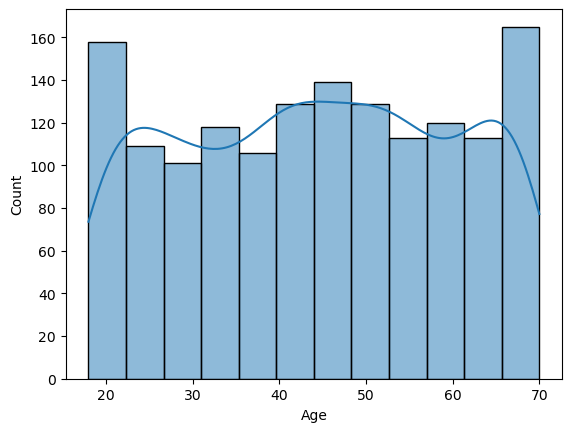

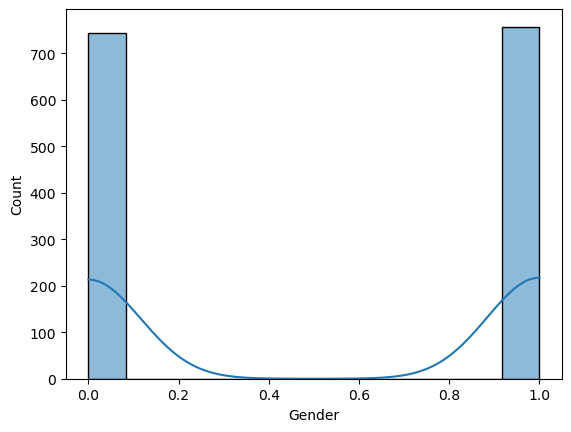

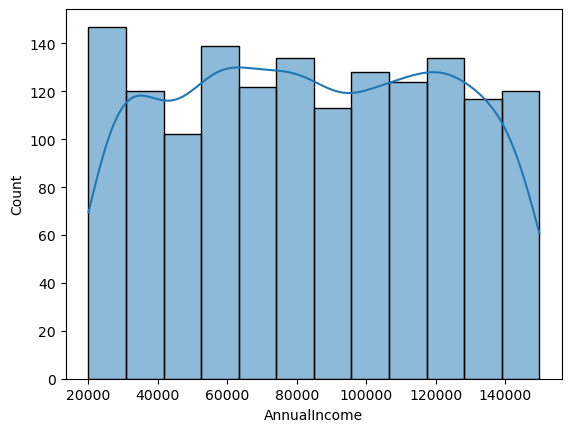

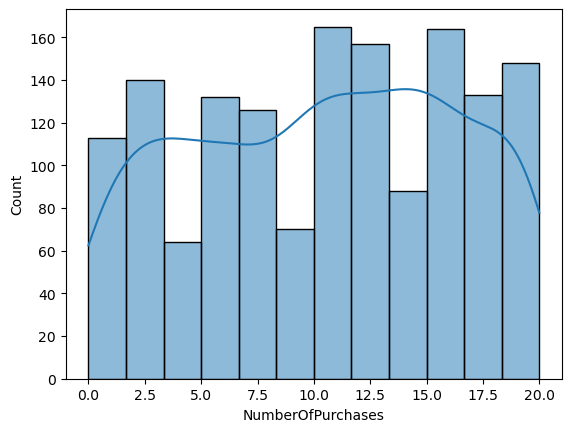

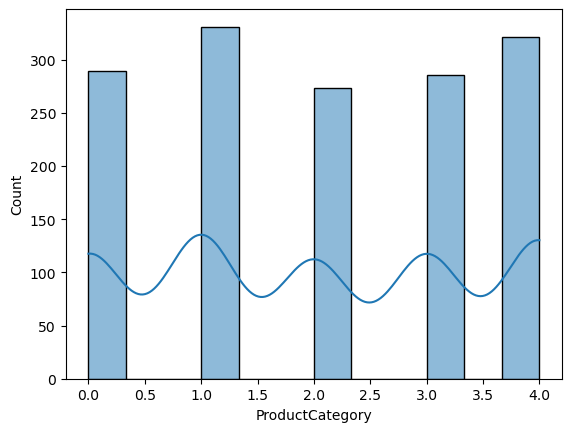

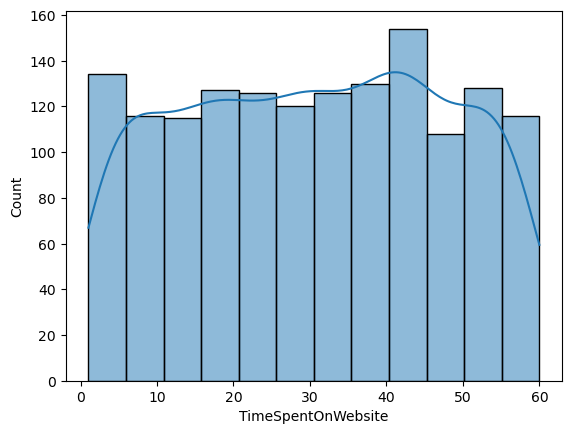

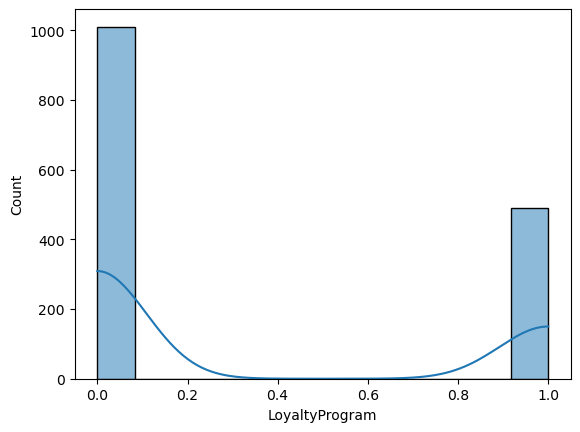

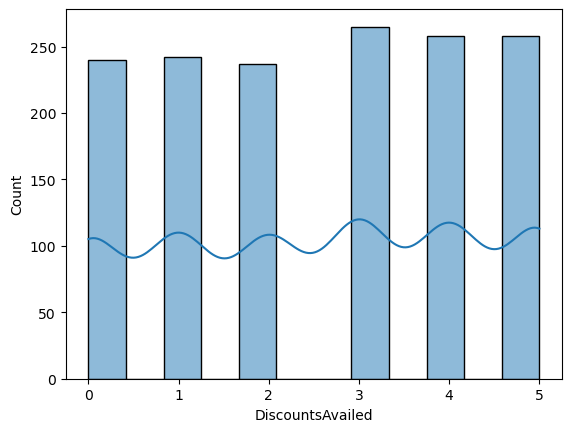

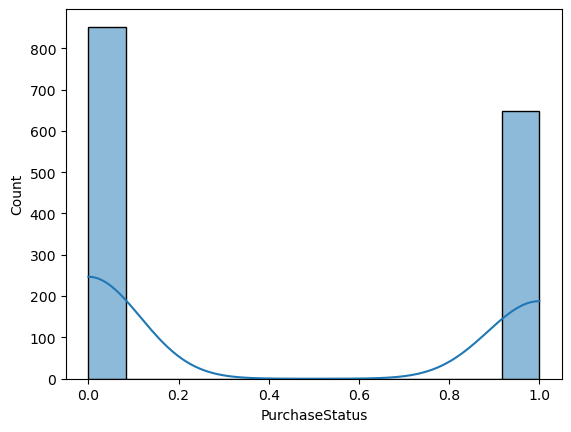

In [7]:
# Plot distributions
columns = df.columns

for column in columns:
    sns.histplot(df[column], kde=True)
    plt.show()

### Correlation between the features

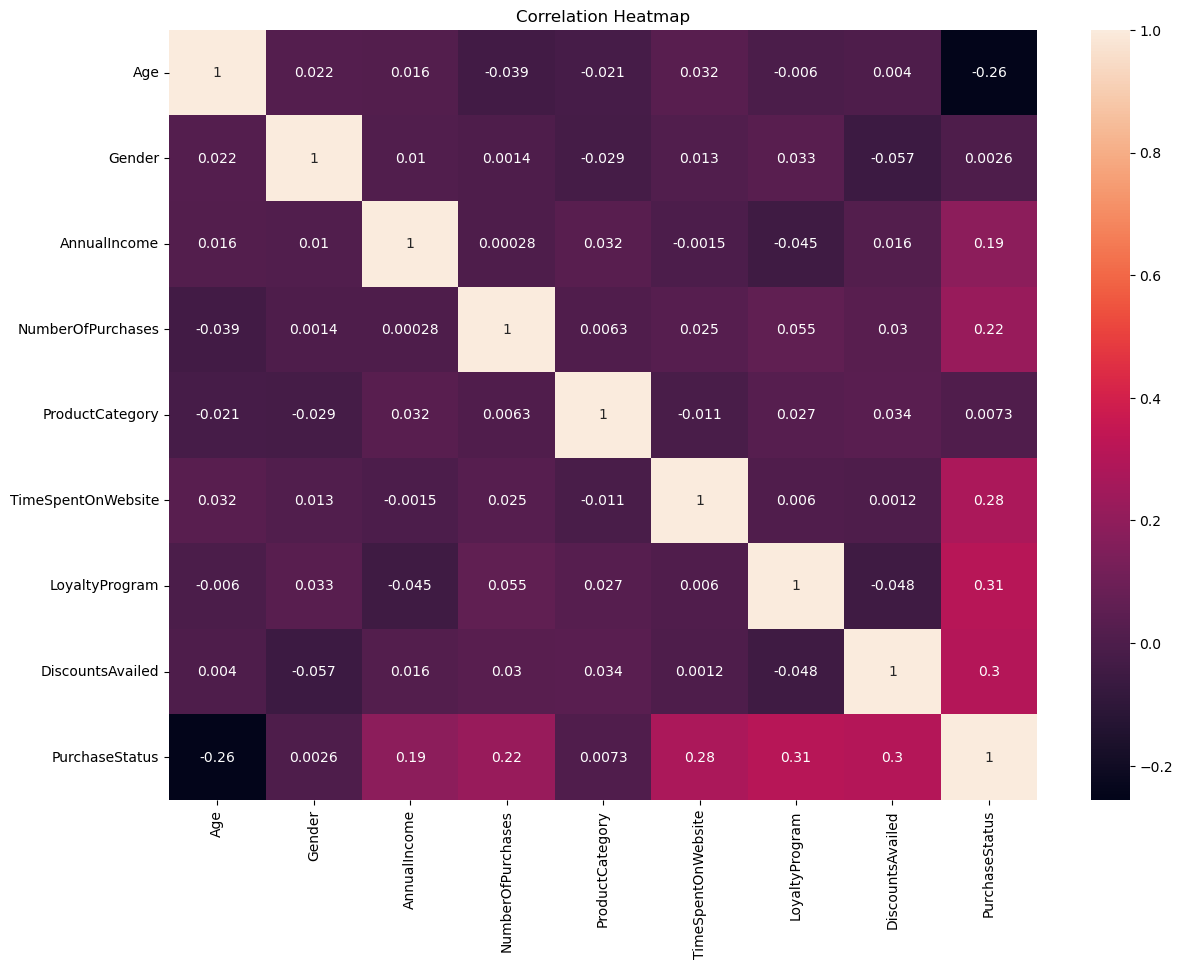

In [8]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True)
plt.title('Correlation Heatmap')
plt.show()

It shows that there is weak or no correlation between Age and PurchaseStatus

#### Checking if Data is imbalance or not on the basis of Target variable

In [87]:
df['PurchaseStatus'].value_counts()

PurchaseStatus
0    740
1    648
Name: count, dtype: int64

Data is not imbalanced

### Encoding

In [17]:
df_encoded = pd.get_dummies(df, columns=['ProductCategory'], prefix='Product',dtype=int)
df_encoded.head(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus,Product_0,Product_1,Product_2,Product_3,Product_4
0,40,1,66120.267939,8,30.568601,0,5,1,1,0,0,0,0
1,20,1,23579.773583,4,38.240097,0,5,0,0,0,1,0,0
2,27,1,127821.306432,11,31.633212,1,0,1,0,0,1,0,0
3,24,1,137798.623120,19,46.167059,0,4,1,0,0,0,1,0
4,31,1,99300.964220,19,19.823592,0,0,1,0,1,0,0,0
5,66,1,37758.117475,14,17.827493,0,2,0,0,0,0,0,1
6,39,1,126883.385286,16,42.085384,1,4,1,0,0,0,1,0
7,64,1,39707.359724,13,17.190292,1,0,0,0,0,1,0,0
8,43,0,102797.301269,20,6.023475,0,3,0,0,1,0,0,0
9,20,1,63854.921080,16,38.572466,0,5,1,1,0,0,0,0


### Define Dependent and Independent Variables

In [18]:
x = df_encoded.drop(columns = ['PurchaseStatus']) # inputs(IVs)

y = df_encoded['PurchaseStatus']                  # target(DV)

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import *

#### Train-Test split

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [20]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(971, 12)
(417, 12)
(971,)
(417,)


### Model Building

In [30]:
def eval_model(model, mname):
    model.fit(x_train, y_train)
    ypred = model.predict(x_test)
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    print(confusion_matrix(y_test,ypred))
    print(classification_report(y_test,ypred))
    pre_npur = precision_score(y_test,ypred, pos_label=0)
    pre_pur = precision_score(y_test,ypred, pos_label=1)
    rec_npur = recall_score(y_test,ypred, pos_label=0)
    rec_pur = recall_score(y_test,ypred, pos_label=1)
    res_df = pd.DataFrame({'Train_acc':train_acc,'Test_Acc':test_acc,
                          'Pre_NP':pre_npur,'Pre_P':pre_pur,
                          'Rec_NP':rec_npur,'Rec_P':rec_pur},
                         index=[mname])
    return res_df

### 1) Logistic Regression

In [31]:
lr1 = LogisticRegression(max_iter=1000)
lr1_res = eval_model(lr1, 'Log_Reg')
lr1_res

[[152  61]
 [ 48 156]]
              precision    recall  f1-score   support

           0       0.76      0.71      0.74       213
           1       0.72      0.76      0.74       204

    accuracy                           0.74       417
   macro avg       0.74      0.74      0.74       417
weighted avg       0.74      0.74      0.74       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Log_Reg,0.727085,0.738609,0.76,0.718894,0.713615,0.764706


### 2) DecisionTreeClassifier

In [42]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=15, min_samples_split=21)
dt1_res = eval_model(dt1, 'Dec_Tree')
dt1_res

[[194  19]
 [ 32 172]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88       213
           1       0.90      0.84      0.87       204

    accuracy                           0.88       417
   macro avg       0.88      0.88      0.88       417
weighted avg       0.88      0.88      0.88       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Dec_Tree,0.92379,0.877698,0.858407,0.900524,0.910798,0.843137


### 3)KNeighborsClassifier

In [46]:
kn1 = KNeighborsClassifier(n_neighbors=50)
kn1_res = eval_model(kn1, 'KNN')
kn1_res

[[136  77]
 [ 88 116]]
              precision    recall  f1-score   support

           0       0.61      0.64      0.62       213
           1       0.60      0.57      0.58       204

    accuracy                           0.60       417
   macro avg       0.60      0.60      0.60       417
weighted avg       0.60      0.60      0.60       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
KNN,0.623069,0.604317,0.607143,0.601036,0.638498,0.568627


### 4) Random Forest

In [59]:
rf1 = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    min_samples_split=15,
    min_samples_leaf=3)
rf1_res = eval_model(rf1, 'Random_Forest')
rf1_res

[[203  10]
 [ 19 185]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       213
           1       0.95      0.91      0.93       204

    accuracy                           0.93       417
   macro avg       0.93      0.93      0.93       417
weighted avg       0.93      0.93      0.93       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Random_Forest,0.950566,0.930456,0.914414,0.948718,0.953052,0.906863


### 5) AdaBoostClassifier

In [53]:
ada1 = AdaBoostClassifier(n_estimators=100)
ada1_res = eval_model(ada1,'AdaBoost_Cls')
ada1_res

[[187  26]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       213
           1       0.87      0.89      0.88       204

    accuracy                           0.88       417
   macro avg       0.88      0.88      0.88       417
weighted avg       0.88      0.88      0.88       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
AdaBoost_Cls,0.933059,0.882494,0.890476,0.874396,0.877934,0.887255


### 6) XG Boost Classifier

In [56]:
xgb1 = XGBClassifier(objective='binary:logistic',eval_metric='logloss',
                    n_estimators=80,eta=0.2,reg_lambda=0.8,reg_alpha=0.2,
                    gamma=0.1)

xgb1_res = eval_model(xgb1,'XGB_Cls')
xgb1_res

[[194  19]
 [ 23 181]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       213
           1       0.91      0.89      0.90       204

    accuracy                           0.90       417
   macro avg       0.90      0.90      0.90       417
weighted avg       0.90      0.90      0.90       417



,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
XGB_Cls,0.99794,0.899281,0.894009,0.905,0.910798,0.887255


In [60]:
all_res = pd.concat([lr1_res, dt1_res, kn1_res,rf1_res, ada1_res, xgb1_res])
all_res

,Train_acc,Test_Acc,Pre_NP,Pre_P,Rec_NP,Rec_P
Log_Reg,0.727085,0.738609,0.760000,0.718894,0.713615,0.764706
Dec_Tree,0.923790,0.877698,0.858407,0.900524,0.910798,0.843137
KNN,0.623069,0.604317,0.607143,0.601036,0.638498,0.568627
Random_Forest,0.950566,0.930456,0.914414,0.948718,0.953052,0.906863
AdaBoost_Cls,0.933059,0.882494,0.890476,0.874396,0.877934,0.887255
XGB_Cls,0.997940,0.899281,0.894009,0.905000,0.910798,0.887255


**RandomForestClassifier seems to be a strong candidate for this task due to its high accuracy and tendency to avoid overfitting compared toother algos. However,AdaBoostClassifier is also good choice and may offer better generalization.**

### Final Model

In [76]:
rf1 = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    min_samples_split=15,
    min_samples_leaf=3)

rf1.fit(x_train, y_train)

RandomForestClassifier(min_samples_leaf=3, min_samples_split=15)

### Predictions Generated

In [78]:
prediction = rf1.predict(x_test)
prediction[:15]

array([0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0], dtype=int64)

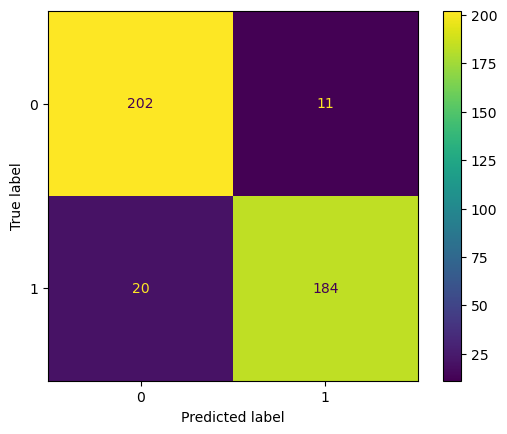

In [85]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, prediction,labels=rf1.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf1.classes_)
disp.plot(values_format='');

In [86]:
cmt_rf2 = pd.DataFrame(
    confusion_matrix(y_test, prediction, labels = rf1.classes_), 
    index = ['True : NOT purchased', 'True : Purchased'], 
    columns = ['Pred : NOT purchased', 'Pred : Purchased'])

cmt_rf2

,Pred : NOT purchased,Pred : Purchased
True : NOT purchased,202,11
True : Purchased,20,184


Explain confusion matrix:

Upper-left quadrant displays the number of 0-0: True negatives.<br>
Upper-right quadrant displays the number of 0-1: False positives.<br>
Bottom-left quadrant displays the number of 1-0: False negatives.<br>
Bottom-right quadrant displays the number of 1-1: True positives.<br>
0-0: True negatives: The number of purchases that did NOT happen and the model accurately predicted "did NOT happen".

0-1: False positives: The number of purchases that did NOT happen and the model inaccurately predicted "did happen".

1-0: False negatives: The number of purchases that did happen and the model inaccurately predicted "did NOT happen".

1-1: True positives: The number of purchases that did happen and the model accurately predicted "did happen".

The Random Forest Model predicts more false negatives (20) than false positives (11), which means that more purchases may be identified as did not happened, while they are did. Regardless, this is a good model with strong scores.